<a href="https://colab.research.google.com/github/JonNData/Lamba-Study-Guides/blob/master/Nguyen_LS_DS_Unit_4_Sprint_Challenge_3_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [100]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# Do not change this line. You need the +1 for some reason. 
max_features = len(word_index.values()) + 1

# TODO - your code!
#len(word_index)
maxlen = 100
batch_size = 10

In [102]:
X_train, y_train

(array([list([1, 248, 409, 166, 265, 1537, 1662, 8, 24, 4, 1222, 2771, 7, 227, 236, 40, 85, 944, 10, 531, 176, 8, 4, 176, 1613, 24, 1662, 297, 5157, 6, 10, 103, 5, 231, 215, 8, 7, 2889, 6, 10, 1202, 69, 4, 1222, 329, 2771, 24, 944, 23, 944, 1662, 40, 2509, 1592, 907, 69, 4, 113, 997, 762, 2539, 7, 227, 236, 17, 12]),
        list([1, 4665, 1183, 413, 381, 7, 1134, 1664, 62, 729, 7, 4, 121, 273, 93, 109, 28, 2115, 72, 11, 428, 4, 387, 989, 558, 3956, 8, 7, 25, 1213, 427, 1969, 223, 4, 213, 5, 387, 580, 8, 1145, 413, 62, 410, 451, 18, 428, 7, 4, 121, 6, 3106, 19, 11, 428, 9, 1283, 317, 65, 413, 138, 59, 12, 11, 428, 6, 6118, 63, 11, 4, 3956, 8, 3640, 1183, 413, 202, 251, 18, 428, 6, 546, 19, 11, 428, 9, 317, 65, 413, 7, 4, 1721, 427, 409, 7145, 138, 19, 19, 11, 428, 6, 3843, 70, 11, 4, 135, 5, 137, 317, 1833, 542, 9, 7145, 413, 138, 72, 47, 11, 428, 6, 19, 5106, 19, 16, 8, 17, 12]),
        list([1, 56, 14065, 65, 9, 249, 149, 8, 4, 347, 5, 25, 65, 9, 249, 282, 333, 27, 258, 20, 6, 644, 

In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [0]:
# Guess we'll pad these suckas
x_train = sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [118]:
x_train, y_train

(array([[1662,  297, 5157, ...,  236,   17,   12],
        [  65,  413,    7, ...,    8,   17,   12],
        [ 659,  249,    7, ...,    8,   17,   12],
        ...,
        [ 794,    8,   16, ..., 1264,   17,   12],
        [  98,    6,  153, ...,  215,   17,   12],
        [   4, 2316,    5, ..., 3036,   17,   12]], dtype=int32),
 array([19, 41, 16, ..., 19,  3, 11]))

In [0]:
# from keras.utils import to_categorical
# y_train_binary = to_categorical(y_train)
# y_test_binary = to_categorical(y_test)

In [0]:
# Build the model
model = Sequential()
# Need this to flatten it to the apt shape
model.add(Embedding(max_features, 128))
# 128 specified by papers/industry. Dropout and recurrent_dropout set our forget params
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(len(y_train), activation='softmax'))


model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [132]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=2,
          validation_data=(x_test, y_test))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 176s 20ms/step - loss: 2.4123 - accuracy: 0.3845 - val_loss: 1.7201 - val_accuracy: 0.5583
Epoch 2/2
8982/8982 [==============================] - 179s 20ms/step - loss: 1.6407 - accuracy: 0.5926 - val_loss: 1.4823 - val_accuracy: 0.6469


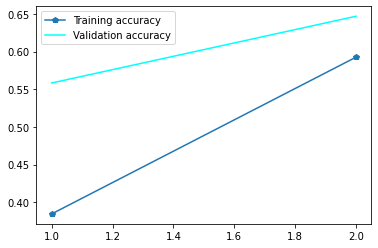

Validation Accuracy: [0.5583258867263794, 0.6469278931617737]


In [135]:
# Results report
import matplotlib.pyplot as plt


epoch_count = range(1,3)

plt.plot(epoch_count , model.history.history['accuracy'], 'p-')
plt.plot(epoch_count , model.history.history['val_accuracy'], 'cyan')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.show();
print('Validation Accuracy:', model.history.history['val_accuracy'])

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

**ANSWER**: The pad_sequences method ensures that all the lists are the same length. Needed to enter it into the model so that it can process each observation equivalently. The shapes wouldn't fit properly otherwise


## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*
**ANSWER**: LSTMs are able to be customized to have remember and forget parameters, specifying dropout in between recursions and also between the LSTM and the Dense layer. This allows for weighting of recent information vs. long term. 


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*
**ANSWER**: Vanilla neural Networks aren't great at capturing features from sequence data, that's where RNN and LSTM shine. So these recursive neural networks work well with text data because the order of the characters and words are the main source of meaning. Time series data matters because the chronology is of interest. These models are also suited well for audio data because the melody is just sequence of frequencies. 

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

In [0]:
from skimage.io import imread_collection
from skimage.transform import resize #This might be a helpful function for you

images = imread_collection('./frog_images/*.jpg')

In [55]:
print(type(images))
print(type(images[0]), end="\n\n")

print("Each of the Images is a Different Size")
print(images[0].shape)
print(images[1].shape)

<class 'skimage.io.collection.ImageCollection'>
<class 'numpy.ndarray'>

Each of the Images is a Different Size
(2137, 1710, 3)
(3810, 2856, 3)


In [75]:
# reshape the image
image_reshape = []
for image in images:
  image_reshape = resize(image, output_shape=(224,224,3))

print(image_reshape[0].shape)
print(image_reshape[1].shape)

(224, 3)
(224, 3)


Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goal* - Check for other things such as fish.

In [0]:
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if entry[1] == 'bullfrog':
      return entry[2]
    if entry[1] == 'tree frog':
      return entry[2]
    if entry[1] == 'tailed frog':
      return entry[2]
  return 0.0

In [93]:
# Let's compare full image with resized
# Full image
for img in images:
  img_contains_frog(img)


[('n01930112', 'nematode', 0.032350022), ('n01496331', 'electric_ray', 0.015001914), ('n03445777', 'golf_ball', 0.014543021)]
[('n09472597', 'volcano', 0.12513255), ('n01930112', 'nematode', 0.08108736), ('n03773504', 'missile', 0.048901953)]
[('n01930112', 'nematode', 0.15511686), ('n04525038', 'velvet', 0.07890502), ('n02219486', 'ant', 0.029604794)]
[('n02219486', 'ant', 0.12076042), ('n02233338', 'cockroach', 0.040772017), ('n02259212', 'leafhopper', 0.038669467)]
[('n03196217', 'digital_clock', 0.10913357), ('n01833805', 'hummingbird', 0.06624019), ('n01873310', 'platypus', 0.042204827)]
[('n02165456', 'ladybug', 0.11579637), ('n02219486', 'ant', 0.07187931), ('n03804744', 'nail', 0.070807554)]
[('n04409515', 'tennis_ball', 0.41539028), ('n04525038', 'velvet', 0.1514141), ('n03445777', 'golf_ball', 0.098719925)]
[('n01944390', 'snail', 0.03210694), ('n01739381', 'vine_snake', 0.031411584), ('n02165456', 'ladybug', 0.030013904)]
[('n01930112', 'nematode', 0.5404693), ('n04592741', 

In [94]:
# Resized
for img in images:
  img_contains_frog(resize(img, output_shape=(224,224,3)))

# Resized is way worse

[('n06359193', 'web_site', 0.062323052), ('n03196217', 'digital_clock', 0.053685647), ('n01930112', 'nematode', 0.052812316)]
[('n03729826', 'matchstick', 0.05975482), ('n06359193', 'web_site', 0.055888124), ('n03196217', 'digital_clock', 0.04703378)]
[('n06359193', 'web_site', 0.05612775), ('n03729826', 'matchstick', 0.051401444), ('n03196217', 'digital_clock', 0.04932685)]
[('n06359193', 'web_site', 0.0629571), ('n01930112', 'nematode', 0.052607417), ('n03196217', 'digital_clock', 0.04884168)]
[('n06359193', 'web_site', 0.064803764), ('n01930112', 'nematode', 0.049625944), ('n03196217', 'digital_clock', 0.04514117)]
[('n06359193', 'web_site', 0.062429693), ('n03196217', 'digital_clock', 0.04622219), ('n01930112', 'nematode', 0.04373119)]
[('n06359193', 'web_site', 0.055801384), ('n03196217', 'digital_clock', 0.055428814), ('n03729826', 'matchstick', 0.052860036)]
[('n03729826', 'matchstick', 0.051139507), ('n06359193', 'web_site', 0.048581924), ('n03196217', 'digital_clock', 0.047856

In [0]:
# Stretch, gone fishin'
# Should be an easy switch for fish.

def img_contains_fish(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  print(results)
  for entry in results:
    if 'fish' in entry[1]:
      return entry[2]
  return 0.0

for img in images:
  img_contains_fish(img)

[('n01930112', 'nematode', 0.032350022), ('n01496331', 'electric_ray', 0.015001914), ('n03445777', 'golf_ball', 0.014543021)]
[('n09472597', 'volcano', 0.12513255), ('n01930112', 'nematode', 0.08108736), ('n03773504', 'missile', 0.048901953)]
[('n01930112', 'nematode', 0.15511686), ('n04525038', 'velvet', 0.07890502), ('n02219486', 'ant', 0.029604794)]
[('n02219486', 'ant', 0.12076042), ('n02233338', 'cockroach', 0.040772017), ('n02259212', 'leafhopper', 0.038669467)]
[('n03196217', 'digital_clock', 0.10913357), ('n01833805', 'hummingbird', 0.06624019), ('n01873310', 'platypus', 0.042204827)]
[('n02165456', 'ladybug', 0.11579637), ('n02219486', 'ant', 0.07187931), ('n03804744', 'nail', 0.070807554)]
[('n04409515', 'tennis_ball', 0.41539028), ('n04525038', 'velvet', 0.1514141), ('n03445777', 'golf_ball', 0.098719925)]
[('n01944390', 'snail', 0.03210694), ('n01739381', 'vine_snake', 0.031411584), ('n02165456', 'ladybug', 0.030013904)]
[('n01930112', 'nematode', 0.5404693), ('n04592741', 

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__  The autoencoder main usages are for dimensionality reduction and denoising. Compressing images is useful for reverse image searches as well. Recreating inputs from a compression is useful for feature extraction. Comparing the decoded output to the input shows how much the model knows about the input.


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
  
  Linear regression and decision trees, because they have high explainability, and can be run quickly
- What area of Data Science would you most like to learn more about, and why?

  Reproducibility, containerization, and packaging I think will be useful for the workplace
- Where do you think Data Science will be in 5 years?

  Continue the trend of misuse and abuse. Big data and being more commonplace among medium sized companies

- What are the threats posed by AI to our society?
  
  When people can't distinguish between AI created content and people, the general worldview can be easily manipulated. Thus, democracy can be tainted. For example, during the net neutrality issues (ongoing) millions of comments in support of letting ISPs throttle and monetize sectors of the internet surfaced. NO ONE but people on the ISPs payroll would benefit, Ajit Pai. 

- How do you think we can counteract those threats? 

  Educate the general  public about the deceit, trace the source of the crimes against democracy, and punish severely.

- Do you think achieving General Artifical Intelligence is ever possible?

  I'm more swayed by the notion of Comprehensive AI Services (CAIS), where if human intelligence level is just one more capability away, that can be managed by another AI. Imagine an AI that can just lookup the latest and greatest at tensorflow hub, and another that manages its implementation. The line separating humanity and artificial creation will be blurred, especially with neural link.

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [95]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")